In [62]:
import pysam
import os
import textwrap
import pandas as pd
import seaborn as sns
# Excelent explanation of the vaccine application flow
# https://www.protocols.io/view/understanding-the-purpose-of-every-nucleotide-in-t-br3am8ie?step=5

In [8]:
pfizer_fname = 'data/pfizer.fa'
covid_sequences = 'data/cov_after_jan_1st_2022/genomic.fna'
if not os.path.exists(pfizer_fname + '.fai'):
    pysam.faidx(pfizer_fname)
pfizer = pysam.FastaFile(pfizer_fname)
#! makeblastdb -in corona_genome.faa -dbtype prot -parse_seqids -input_type fasta
# sed 1d pfizer_s_protein.faa | wc -c
# tr -cd '[:space:]' < pfizer_s_protein.faa | wc -m      Calculate spaces
# https://web.expasy.org/translate/
# blastp -db ALL_S/999.faa -query pfizer_s_protein.faa -out results_999.csv -outfmt 7 -max_target_seqs 99999999# AZ https://www.ncbi.nlm.nih.gov/protein/YP_009724390.1

In [51]:
def write_fasta(dictionary, filename):
    """
    Takes a dictionary and writes it to a fasta file
    Must specify the filename when caling the function
    """
    with open(filename, "w") as outfile:
        for key, value in dictionary.items():
            outfile.write(key + "\n")
            outfile.write("\n".join(textwrap.wrap(value, 60)))
            outfile.write("\n")
            
s_pfizer = pfizer.fetch(pfizer.references[0], 103-1, 3879-1)  # From 11889.doc
write_fasta({'Pfizer s protein': s_pfizer}, 'data/pfizer_s_protein.fa')

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
count,9999.000000,9999.0,9999.000000,9999.0,9999.0,9999.0,9999.000000,9999.000000,9999.0,9999.000000
mean,99.789387,1257.0,2.632663,0.0,1.0,1257.0,17.000900,1273.000900,0.0,2600.139814
std,0.038618,0.0,0.482725,0.0,0.0,0.0,0.090005,0.090005,0.0,1.438078
min,99.680000,1257.0,2.000000,0.0,1.0,1257.0,17.000000,1273.000000,0.0,2599.000000
25%,99.760000,1257.0,2.000000,0.0,1.0,1257.0,17.000000,1273.000000,0.0,2599.000000
50%,99.760000,1257.0,3.000000,0.0,1.0,1257.0,17.000000,1273.000000,0.0,2599.000000
75%,99.840000,1257.0,3.000000,0.0,1.0,1257.0,17.000000,1273.000000,0.0,2602.000000
max,99.840000,1257.0,4.000000,0.0,1.0,1257.0,26.000000,1282.000000,0.0,2602.000000


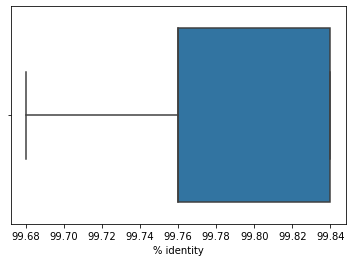

In [77]:
def read_results(fname):
    fields = ['query id', 'subject id', '% identity', 'alignment length', 
              'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 
              's. end', 'evalue', 'bit score']
    df = pd.read_csv(fname, comment='#', sep='\t')
    df.columns = fields
    df = df.sort_values('% identity')
    display(df.describe())
    sns.boxplot(x=df['% identity'], flierprops = dict(markerfacecolor = '0.50', markersize = 2))
read_results('data/results_10000.csv')

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
count,708.000000,708.000000,708.000000,708.000000,708.0,708.0,708.0,708.000000,708.0,708.000000
mean,96.699407,1258.673729,35.077684,2.977401,1.0,1257.0,17.0,1269.836158,0.0,2467.960452
std,1.839649,1.490959,21.123357,1.310192,0.0,0.0,0.0,1.271488,0.0,57.558591
min,91.110000,1257.000000,10.000000,1.000000,1.0,1257.0,17.0,1267.000000,0.0,2295.000000
25%,95.700000,1257.000000,12.750000,1.000000,1.0,1257.0,17.0,1270.000000,0.0,2437.500000
50%,96.750000,1260.000000,32.000000,4.000000,1.0,1257.0,17.0,1270.000000,0.0,2469.000000
75%,98.830000,1260.000000,47.000000,4.000000,1.0,1257.0,17.0,1271.000000,0.0,2534.000000
max,99.050000,1260.000000,103.000000,4.000000,1.0,1257.0,17.0,1271.000000,0.0,2541.000000


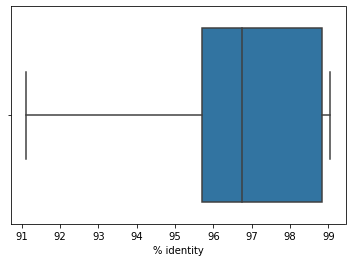

In [78]:
# blastp -db cov_after_jan_1st_2022/protein.faa -query vaccines/pfizer_s_protein.faa -out results_latest_709.csv -outfmt 7 -max_target_seqs 10000
read_results('data/results_latest_709.csv')